# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 

In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/users/whitm/OneDrive/Desktop/ADS509/M1_Assignment_Data/M1_Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 

In [4]:
# Read in the lyrics data
artists = ['robyn','cher']

# List for lyrics and titles
r_lyrics = []
c_lyrics = []

# lists for artists names
r = []
c = []
for a in artists:
    for file in os.listdir(f'{data_location}{lyrics_folder}'+a+'/'):
        if file.endswith('.txt'):
            with open(f'{data_location}{lyrics_folder}'+a+'/'+file,'r') as data:
                if a == 'robyn':
                    r_lyrics.append(data.read())
                    r.append('Robyn')
                else:
                    c_lyrics.append(data.read())
                    c.append('Cher')
        else:
            print("Error File Not Text")

lyrics = pd.DataFrame({"artist": r+c, "lyrics": r_lyrics+c_lyrics})
lyrics.head(-5)

,artist,lyrics
0,Robyn,"""88 Days""\n\n\n\nI light a candle in the morni..."
1,Robyn,"""Ain't No Thing""\n\n\n\n[Verse 1:]\nBoy you go..."
2,Robyn,"""Anytime You Like""\n\n\n\nIt's like you're wai..."
3,Robyn,"""Baby Forgive Me""\n\n\n\nHere come the night\n..."
4,Robyn,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow..."
...,...,...
410,Cher,"""You Better Sit Down Kids""\n\n\n\nBetter sit d..."
411,Cher,"""You Don't Have To Say You Love Me""\n\n\n\nWhe..."
412,Cher,"""You Haven't Seen The Last Of Me""\n\n\n\nFeeli..."
413,Cher,"""You Know It""\n\n\n\nYou're the kinda of girl\..."


In [5]:
# Doing a little prep work to make the normalization/transformation a little easier
titles = []
li_lyrics = []
for i in lyrics['lyrics']:
    # splitting lyrics from titles
    x, y = i.split('\n\n\n\n')
    # appending titles and lyrics for placement in a dataframe
    titles.append(x.replace('"', ''))
    li_lyrics.append(y.replace('\n',' '))

# putting new lyrics and titles columns into dataframe
lyrics['lyrics'] = li_lyrics
lyrics['titles'] = titles

In [6]:
# Read in the twitter data
# dictionary for twitter descriptions
twitter_desc = defaultdict(list)

# list
r_desc = []
c_desc = []

# loop through the artist list robyn, cher
for a in artists:

    # reading the files as a csv skipping the bad lines in the cher file and dropping the null values
    df = pd.read_csv(f"{data_location}{twitter_folder}"+a+"_followers_data.txt", sep="\t", error_bad_lines=False, warn_bad_lines=False)['description'].dropna()
    for i in list(df):
        # looping through the dataframe to save as a list for the dictionary
        if a == 'robyn':
            r_desc.append(i)
        else:
            c_desc.append(i)
        
twitter_desc['robyn'] = r_desc
twitter_desc['cher'] = c_desc

C:\Users\whitm\AppData\Local\Temp\ipykernel_13164\4037894488.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f"{data_location}{twitter_folder}"+a+"_followers_data.txt", sep="\t", error_bad_lines=False, warn_bad_lines=False)['description'].dropna()
C:\Users\whitm\AppData\Local\Temp\ipykernel_13164\4037894488.py:13: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f"{data_location}{twitter_folder}"+a+"_followers_data.txt", sep="\t", error_bad_lines=False, warn_bad_lines=False)['description'].dropna()
C:\Users\whitm\AppData\Local\Temp\ipykernel_13164\4037894488.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f"{data_location}{twitter_folder}"+a+"_follow

In [7]:
# Example of dictionary
print(twitter_desc['robyn'][0:2])
print(twitter_desc['cher'][0:2])

['I love chill •Facebook / Instagram / SoundCloud: AngelxoArts• https://t.co/447okKLKzA…', "books, movies, music, nature & TV shows. OG Sweetee since '12 thanks to YouTube recommending 'This Feeling' on my homepage ♥️"]
['𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜', '163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡']


### Importing Text Data

In [8]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.
def read_texts(path):
    negative = pd.read_csv(f"{path}negative-words.txt", header=None)
    negative.columns = ['word']
    positive = pd.read_csv(f"{path}positive-words.txt", header=None)
    positive.columns = ['word']
    negative['sentiment'] = [-1] * len(negative)
    positive['sentiment'] = [1] * len(positive)
    sentiment_df = pd.concat([negative, positive], axis = 0)
    sentiment_df.rename(columns = {'0': 'words'}, inplace = True)

    tidy_df = pd.read_csv(f"{path}tidytext_sentiments.txt", sep = "\t")

    sent = []
    for i in tidy_df['sentiment']:
        if i == 'negative':
            sent.append(-1)
        else:
            sent.append(+1)
    senn = pd.DataFrame({"word": list(tidy_df['word']), "sentiment": sent})

    data = pd.concat([senn, sentiment_df], axis = 0)

    return data

In [9]:
sentiment_df = read_texts("C:/users/whitm/OneDrive/Desktop/ADS509/M1_Assignment_Data/M1_Results/")

In [10]:
sentiment_df.head()

,word,sentiment
0,abandon,-1
1,abandoned,-1
2,abandonment,-1
3,abba,1
4,abduction,-1


### Clean the text

In [11]:

# clean list to add to pd.DataFrame
cleaned_lyrics = []
df_count = 0
cher_lyrics = []
robyn_lyrics = []

# list to store splits before searching stopwordss
splitt = []

# loop through lyric values
for i in lyrics['lyrics']:
    # removing verse counts 
    i = i.replace('[Verse 1:]', '').replace('[Verse 2:]', '').replace('[Verse 3:]', '').replace('[Verse 4:]', '').replace('[Verse 5:]', '')

    # append lyrics without punctuation or capitalization that have also been split
    splitt.append(i.casefold().split())

# loop through the split lists
for i in splitt:
    df_count += 1
    tmp = []

    # loop through the splits lists words
    for w in i:
        
        # keep if not in stopwords set
        if w not in sw:
                    
                    # append to temp storage
                    tmp.append(w.translate(str.maketrans('', '', punctuation)))
                    
                    if lyrics['artist'].loc[df_count-1] == 'Robyn':
                        robyn_lyrics.append(w.translate(str.maketrans('', '', punctuation)))
                    else:
                        cher_lyrics.append(w.translate(str.maketrans('', '', punctuation)))

    # append to clean lyrics lists
    cleaned_lyrics.append(tmp)

lyrics['cleaned_lyrics'] = cleaned_lyrics

In [12]:
print("Length of 88 Days by Robyn before cleaning: ", len(lyrics['lyrics'][0]))
print(" ")
print("Length of 88 Days by Robyn after cleaning: ", len(lyrics['cleaned_lyrics'][0]))
lyrics.head()

Length of 88 Days by Robyn before cleaning:  1624
 
Length of 88 Days by Robyn after cleaning:  206


,artist,lyrics,titles,cleaned_lyrics
0,Robyn,I light a candle in the morning To signify th...,88 Days,"[light, candle, morning, signify, still, mind,..."
1,Robyn,"[Verse 1:] Boy you gotta want me, really reall...",Ain't No Thing,"[boy, gotta, want, me, really, really, want, b..."
2,Robyn,It's like you're waiting for me to start There...,Anytime You Like,"[like, waiting, start, theres, right, moment, ..."
3,Robyn,"Here come the night In your eyes Baby, be brav...",Baby Forgive Me,"[come, night, eyes, baby, brave, wise, like, m..."
4,Robyn,(So you wanna go out? How you gonna get there?...,Beach 2K20,"[so, wanna, go, out, gonna, get, there, ok, ca..."


### Calculate Sentiment

In [13]:
# your code here
artist = []
ly = []
lyr = []
song = []
pos = []
neg = []
tot = []
full = []
for i, l in enumerate(lyrics['cleaned_lyrics']):
    
    artist.append(lyrics['artist'][i])
    song.append(lyrics['titles'][i])
    ly.append(lyrics['cleaned_lyrics'][i])
    lyr.append(lyrics['lyrics'][i])
    
    sentiment = []
    
    for w in l:
        if w in list(sentiment_df['word']):
            sentiment.append(w)
    song_sent = sentiment_df[sentiment_df['word'].isin(sentiment)]  
    
    sent = []
    for c in Counter(sentiment):
        sent.append(int(song_sent[song_sent['word'] == c]['sentiment'].head(1) * Counter(sentiment)[c]))
    fp = []
    fn = []
    for n in sent:
        if n > 0:
            fp.append(n)
        else:
            fn.append(n)
    pos.append(sum(fp))
    neg.append(sum(fn))
    tot.append(sum(sent))
            
    full.append(sent)
    
    
song_sentiment = pd.DataFrame({'artist': artist, 'song': song, 'lyrics': lyr, 'cleaned_lyrics': ly, 'positive': pos, 'negative': neg, 'total': tot, 'full': full}) 

In [14]:
song_sentiment.head(-5)

,artist,song,lyrics,cleaned_lyrics,positive,negative,total,full
0,Robyn,88 Days,I light a candle in the morning To signify th...,"[light, candle, morning, signify, still, mind,...",42,-9,33,"[-1, -1, 2, 2, 1, -3, 3, 2, 7, 16, 2, 2, -1, -..."
1,Robyn,Ain't No Thing,"[Verse 1:] Boy you gotta want me, really reall...","[boy, gotta, want, me, really, really, want, b...",8,-5,3,"[-3, 4, 1, -1, 1, 1, -1, 1]"
2,Robyn,Anytime You Like,It's like you're waiting for me to start There...,"[like, waiting, start, theres, right, moment, ...",20,-26,-6,"[8, 1, -1, -8, 1, -1, 1, -13, 5, 1, 1, -1, 1, ..."
3,Robyn,Baby Forgive Me,"Here come the night In your eyes Baby, be brav...","[come, night, eyes, baby, brave, wise, like, m...",39,0,39,"[18, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1]"
4,Robyn,Beach 2K20,(So you wanna go out? How you gonna get there?...,"[so, wanna, go, out, gonna, get, there, ok, ca...",28,-2,26,"[-2, 5, 5, 5, 5, 5, 3]"
...,...,...,...,...,...,...,...,...
410,Cher,You Better Sit Down Kids,"Better sit down kids I'll tell you why, kids Y...","[better, sit, kids, ill, tell, why, kids, migh...",7,-15,-8,"[2, -4, -5, -2, -2, 1, 1, -1, 1, 1, 1, -1]"
411,Cher,You Don't Have To Say You Love Me,When I said I needed you You said you would al...,"[said, needed, said, would, always, stay, chan...",6,-3,3,"[-1, 6, -1, -1]"
412,Cher,You Haven't Seen The Last Of Me,Feeling broken Barely holding on But there's j...,"[feeling, broken, barely, holding, theres, som...",6,-14,-8,"[-1, -1, 1, -5, 2, -3, 1, -2, 1, -1, -1, 1]"
413,Cher,You Know It,You're the kinda of girl You can't get next to...,"[kinda, girl, cant, get, next, shylying, walke...",15,-4,11,"[1, 1, -2, 2, 4, 3, 3, -1, 1, -1]"


## Robyn Sentiment Statistics

In [15]:
print("Robyn Mean Positive Sentiment Lyrics:", song_sentiment[song_sentiment['artist']=='Robyn']['positive'].mean())
print("Robyn Mean Negative Sentiment Lyrics:", song_sentiment[song_sentiment['artist']=='Robyn']['negative'].mean())
print("Robyn Mean Total Sentiment Lyrics:", song_sentiment[song_sentiment['artist']=='Robyn']['total'].mean())

Robyn Mean Positive Sentiment Lyrics: 23.615384615384617
Robyn Mean Negative Sentiment Lyrics: -15.259615384615385
Robyn Mean Total Sentiment Lyrics: 8.35576923076923


### Negative Robyn Lyrics

In [16]:
song_sentiment[song_sentiment['artist'] == 'Robyn'].sort_values(by='total').head(4)

,artist,song,lyrics,cleaned_lyrics,positive,negative,total,full
27,Robyn,Don't Fucking Tell Me What To Do 2,My drinking is killing me My drinking is killi...,"[drinking, killing, drinking, killing, drinkin...",6,-96,-90,"[-16, -68, -3, 2, 2, 2, -9]"
26,Robyn,Don't Fucking Tell Me What To Do,My drinking is killing me My drinking is killi...,"[drinking, killing, drinking, killing, drinkin...",6,-96,-90,"[-16, -68, -3, 2, 2, 2, -9]"
18,Robyn,Criminal Intent,"Somebody alert the authorities, I got criminal...","[somebody, alert, authorities, got, criminal, ...",9,-60,-51,"[-16, -7, -7, -7, -8, -1, 1, -1, 2, -1, -1, 1,..."
65,Robyn,Love Kills,If you're looking for love Get a heart made of...,"[looking, love, get, heart, made, steel, cus, ...",40,-64,-24,"[24, -14, -4, -4, 4, 8, -7, -10, -10, -7, 4, -..."


In [17]:
print(song_sentiment[song_sentiment['song'] == "Criminal Intent"]['lyrics'].values)

["Somebody alert the authorities, I got criminal intent Conspiracy to engage in lewd and indecent acts and events I'mma wind it, grind it, oh my, I'mma say it again Somebody alert the authorities, she's got criminal intent  Somebody alert the authorities, I got criminal intent Conspiracy to engage in lewd and indecent acts and events I'mma wind it, grind it, oh my, I'mma say it again Somebody alert the authorities, she's got criminal intent  Somebody alert the authorities, I got criminal intent Conspiracy to engage in lewd and indecent acts and events I'mma wind it, grind it, oh my, I'mma say it again Somebody alert the authorities, I got criminal intent  - Will the defendant please rise? State your full name for the record. - Robyn - Do you wish to say anything before the sentence is imposed? - I do your Honor!  You know, from time to time I need to get down Unwind and just bump and grind Get my shot on, have some fun A little dirty never hurt anyone I admit, I can get somewhat X-rate

In [18]:
print(song_sentiment[song_sentiment['song'] == "Don't Fucking Tell Me What To Do"]['lyrics'].values)

["My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me  My smoking is killing me My diet is killing me My heels are killing me My shopping's killing me My ego is killing me Can't sleep, it's killing me My label's killing me Kickdrum  My phone is killing me My email is killing me These hours are killing me My tour is killing me This flight is killing me My manager's killing me My mother's killing me My landlord's killing me My boss is killing me The TV is killing me Your nagging is killing me My boyfriend's killing me My talking's killing me Killing me Killing me  Can't sleep, it's killing me My dreams are killing me TV is killing me My talking's killing m

In [19]:
print(song_sentiment[song_sentiment['song'] == "Love Kills"]['lyrics'].values)

["If you're looking for love Get a heart made of steel 'cus you know that love kills Don't go messing with love It'll hurt you for real, don't you know that love kills  If you're looking for love Get a heart made of steel 'cus you know that love kills Don't go messing with love It'll hurt you for real, don't you know that love kills  Protect yourself, 'cus you'll wreck yourself In this cold, hard world, so check yourself You conceal your dreams and you shield yourself 'Til that one kind soul reveals itself  Protect yourself, 'cus you'll wreck yourself In this cold, hard world, so check yourself You conceal your dreams and you shield yourself 'Til that one kind soul reveals itself  If you're looking for love Get a heart made of steel 'cus you know that love kills Don't go messing with love It'll hurt you for real, don't you know that love kills  If you're looking for love Get a heart made of steel 'cus you know that love kills Don't go messing with love It'll hurt you for real, don't yo

### Positive Robyn Lyrics

In [35]:
song_sentiment[song_sentiment['artist'] == 'Robyn'].sort_values(by='total', ascending = False).head(4)

,artist,song,lyrics,cleaned_lyrics,positive,negative,total,full
64,Robyn,Love Is Free,"Free Love is free, baby Free Love is free, bab...","[free, love, free, baby, free, love, free, bab...",145,-20,125,"[31, 18, 24, 46, 3, -3, 3, -3, 3, 3, -8, 6, 2,..."
99,Robyn,We Dance To The Beat 2,We dance to the beat We dance to the beat We d...,"[dance, beat, dance, beat, dance, beat, dance,...",82,-16,66,"[67, 1, 1, -1, 1, -1, 1, -3, 3, 1, 1, 1, 1, -1..."
98,Robyn,We Dance To The Beat,We dance to the beat We dance to the beat We d...,"[dance, beat, dance, beat, dance, beat, dance,...",82,-16,66,"[67, 1, 1, -1, 1, -1, 1, -3, 3, 1, 1, 1, 1, -1..."
7,Robyn,Between The Lines,"Even reading in between the lines Every day, ...","[even, reading, lines, every, day, hit, phone,...",57,-5,52,"[19, -3, 3, 13, 15, 1, -1, 2, 1, -1, 2, 1]"


In [36]:
print(song_sentiment[song_sentiment['song'] == "Love Is Free"]['lyrics'].values)

["Free Love is free, baby Free Love is free, baby Boom boom boom boom boom chica boom Let me give it to you, baby Chica boom chica boom chica boom Chica boom chica boom chica boom Free Love is free, baby Free Love is free, baby Boom boom boom boom boom chica boom Let me give it to you, baby  I'ma give it to you, baby I'ma give it when I'm ready Some lose, some steady Some light, some heavy It's all over this city Sometimes in the ugly, sometimes in the pretty You never know where you get it cause you can't control it and you can't unfold it, slow down  I'ma give it to you, baby I'ma give it when I'm ready Some lose, some steady Some light, some heavy It's all over this city Sometimes in the ugly, sometimes in the pretty You never know where you get it cause you can't control it and you can't unfold it, slow down  Free Love is free, baby Free Love is free, baby Boom boom boom boom boom chica boom Let me give it to you, baby Yeah! Yeah! Yeah! Yeah! Love is free, baby Love is free, baby  

In [37]:
print(song_sentiment[song_sentiment['song'] == "We Dance To The Beat"]['lyrics'].values)

["We dance to the beat We dance to the beat We dance to the beat We dance to the beat We dance to the beat We dance to the beat We dance to the beat We dance to the beat We dance to the beat We dance to the beat We dance to the beat We dance to the beat We dance to the beat We dance to the beat We dance to the beat We dance to the beat  We dance to the beat of the continents shifting under our feet We dance to the beat We dance to the beat We dance to the beat of a new, better, faster breed We dance to the beat We dance to the beat We dance to the beat of radioactivity blocking the exits We dance to the beat We dance to the beat We dance to the beat of false math and unrecognised genius We dance to the beat We dance to the beat We dance to the beat of distorted knowledge passed on We dance to the beat We dance to the beat We dance to the beat of a distant rumble We dance to the beat We dancing And it's loud and proud And it's loud and proud And it's loud and proud  We dance to the beat

In [38]:
print(song_sentiment[song_sentiment['song'] == "Between The Lines"]['lyrics'].values)

["Even reading in between the lines  Every day, you hit my phone up Every time (You hit my phone up) It makes my heart jump I want you to say it, baby (It makes my heart jump) Say it like you mean it It's right there on the tip of your tongue (You hit my phone up) And I can feel it And I like it baby Don't you stop (Don't stop what you're doing, baby) You know I like it You stretch it out (You know I like it) You give massages It's not your words (You know I like it) It's what's in between them There's no need to spell out (It makes my heart jump) I know you want it And I like it baby  I'm reading in between the lines I'm reading in between the lines (You got me reading in between the lines) I'm reading in between the lines (Even reading in between the lines) I'm reading in between the lines (You got me reading in between the lines) And I like it, baby And I like it, baby (Even reading in between the lines)  I don't mind (i don't really mind it baby) When we get silent Pressure's risin

## Cher Lyric Sentiment

In [39]:
print("Cher Mean Positive Sentiment Lyrics:", song_sentiment[song_sentiment['artist']=='Cher']['positive'].mean())
print("Cher Mean Negative Sentiment Lyrics:", song_sentiment[song_sentiment['artist']=='Cher']['negative'].mean())
print("Cher Mean Total Sentiment Lyrics:", song_sentiment[song_sentiment['artist']=='Cher']['total'].mean())

Cher Mean Positive Sentiment Lyrics: 16.604430379746834
Cher Mean Negative Sentiment Lyrics: -10.949367088607595
Cher Mean Total Sentiment Lyrics: 5.655063291139241


### Negative Cher

In [40]:
song_sentiment[song_sentiment['artist'] == 'Cher'].sort_values(by='total').head(3)

,artist,song,lyrics,cleaned_lyrics,positive,negative,total,full
120,Cher,Bang-Bang,Bang bang you shot me down Bang bang I hit the...,"[bang, bang, shot, bang, bang, hit, ground, ba...",16,-87,-71,"[-62, -10, -4, -4, 9, -1, 1, 1, -1, 1, 1, 1, -..."
121,Cher,Bang Bang (My Baby Shot Me Down),I was five and he was six We rode on horses ma...,"[five, six, rode, horses, made, sticks, wore, ...",7,-40,-33,"[-1, 1, 1, -1, -24, -5, -3, -3, 2, 1, -1, 1, 1..."
300,Cher,Outrageous,"Outrageous, outrageous (They say) I'm outrageo...","[outrageous, outrageous, they, say, im, outrag...",6,-36,-30,"[-15, -7, -1, -1, 2, -1, -2, -1, -1, -1, -1, 1..."


In [41]:
print(song_sentiment[song_sentiment['song'] == "Bang-Bang"]['lyrics'].values)

["Bang bang you shot me down Bang bang I hit the ground Bang bang that awful sound Bang bang my baby shot me down  I was five and you were six We rode on horses made of sticks I wore black you wore white You would always win the fight  Bang bang you shot me down Bang bang I hit the ground Bang bang that awful sound Bang bang my baby shot me down  Seasons came and changed the time I grew up I called you mine You would always laugh and say Remember when we used to play  Bang bang you shot me down Bang bang and I hit the ground Bang bang that awful sound Bang bang my baby shot me down  Music played and people sang Just for me the church bells rang After echoes from a gun We both vowed that we'd be one  Now you're gone I don't know why Sometimes I cry You didn't say goodbye You didn't take the time to lie  Bang bang you shot me down Bang bang I hit the ground Bang bang that awful sound Bang bang my baby shot me down  Bang bang you shot me right between my eyes Bang bang you can't go paraly

In [42]:
print(song_sentiment[song_sentiment['song'] == "Bang Bang (My Baby Shot Me Down)"]['lyrics'].values)

["I was five and he was six We rode on horses made of sticks He wore black and I wore white He would always win the fight  Bang bang, he shot me down Bang bang, I hit the ground Bang bang, that awful sound Bang bang, my baby shot me down  Seasons came and changed the time When I grew up I called him mine He would always laugh and say Remember when we used to play  Bang bang, I shot you down Bang bang, you hit the ground Bang bang, that awful sound Bang bang, I used to shoot you down  Music played and people sang Just for me the church bells rang  Now he's gone I don't know why And 'til this day, sometimes I cry He didn't even say goodbye He didn't take the time to lie  Bang bang, he shot me down Bang bang, I hit the ground Bang bang, that awful sound Bang bang, my baby shot me down "]


In [43]:
print(song_sentiment[song_sentiment['song'] == "Outrageous"]['lyrics'].values)

["Outrageous, outrageous (They say) I'm outrageous It's the rage  I'm gonna wear what I will and spend some And I will be dress to kill don'tcha know And when the lights come up I'm ready I'm ready To put on a show with class And if I clash it's cause I want to What a show and I want everyone to know They're gonna fly up, get an eyeful Everything that's craved from me I'm gonna be, I'm gonna be outrageous  Outrageous (They say) I'm outrageous It's the rage it's the rage  With my long black hair hanging way down to my Ask me no questions and I'll tell you no lies Don't tell me what to do don't tell me what to be See I don't trust anybody else's traits about make-up and me  Well in my show I let everything go Is what you want is whatcha wanna see from me But when the curtain comes down And you're on your way back home I change into my jeans that are split at the seam I grab my funky black jacket and make quite a racket You drive like you're an outlaw Cause everything that's craved from m

### Positive Cher

In [44]:
song_sentiment[song_sentiment['artist'] == 'Cher'].sort_values(by='total', ascending = False).head(3)

,artist,song,lyrics,cleaned_lyrics,positive,negative,total,full
259,Cher,Love And Understanding,"Here, here in this world Where do we go? Where...","[here, world, go, turn, need, love, seems, lov...",63,-5,58,"[17, 1, 2, 1, -1, 21, 3, 2, 2, 8, 4, -4, 1, 1]"
302,Cher,Perfection,"Hush little Baby, gotta be strong 'Cause in th...","[hush, little, baby, gotta, strong, cause, wor...",69,-22,47,"[1, 1, 1, -1, 2, 1, -1, 1, 5, 1, 17, -3, -2, 2..."
212,Cher,I Found You Love,"Well I was looking for a new love, a different...","[well, looking, new, love, different, kind, tr...",58,-11,47,"[3, 20, 3, 5, -3, 3, 1, 11, 3, -1, 1, -1, 2, -..."


In [45]:
print(song_sentiment[song_sentiment['song'] == "Love And Understanding"]['lyrics'].values)

["Here, here in this world Where do we go? Where can we turn? When we need some love It seems that love just can't be found Where, where do we stand? When love's supply don't meet love's demand  We got enough stars to light the sky at night Enough sun to make to make the whole world bright We got more than enough But there's one thing there's just not enough of  Not enough love and understanding We could use some love to ease these troubled times Not enough love and understanding Why, oh why?  Spend all of our time Building buildings up to the sky Reaching everywhere But where we need to reach the most Hearts never can win Oh, in this race, this race that we're in  We've got enough cars to drive around the world Enough planes to take us anywhere We got more than enough But there's one thing there's just not enough of  Not enough love and understanding We could use some love to ease these troubled times Not enough love and understanding Why, oh why?  Not enough love and understanding We

In [46]:
print(song_sentiment[song_sentiment['song'] == "Perfection"]['lyrics'].values)

["Hush little Baby, gotta be strong 'Cause in this world we are born to fight Be the best, prove them wrong A winner's work is never done, reach the top, number one  Oh, perfection You drive me crazy with perfection I've worn my pride as my protection Perfection, ohh  I was taught to be tough That the best that you can be ain't enough Crack the whip, sacrifice But I found out paradise had a price  I didn't know it then, but oh I know it now You gotta work as hard as love to make the love work out You know this heart of mine has made some big mistakes I guess that when it comes to love, I just don't know what I takes  All my life I've been driven by perfection Pushed it to the limit every day and night Ohh, I've been driven by perfection But nothing's perfect when love ain't right Nothing's perfect when the love ain't right  Gave it all, played my part I gave everything I had but my heart Worked so hard, made a name But the loneliness inside stays the same  When love is here today, and 

In [47]:
print(song_sentiment[song_sentiment['song'] == "I Found You Love"]['lyrics'].values)

["Well I was looking for a new love, a different kind of true love Who's gonna treat me right, all day and night Hey baby I've been looking too And I have found there's No other love from me but you Well I was looking for a new love A different kind of true love Who's gonna treat me right Day and night Well I found what I was after Now my life is filled with laughter I found you love I was lost with no direction Then my life was one big question I was down and out Filled with doubt Found what I was after Now my life is filled with laughter I found you love I found you love I found a new love He's wonderful and true He's gonna spent his money He's gonna call me honey I gonna tease her Oh Lord, I gonna squeeze her Gonna love her plenty She's gonna make me manly We're gonna hold love while we can I've been looking for a new love A different kind of true love Who's gonna treat me right Every day and every night Now I found what I was after Now my life is filled with laughter I found you lo

### Plotting the Distributions

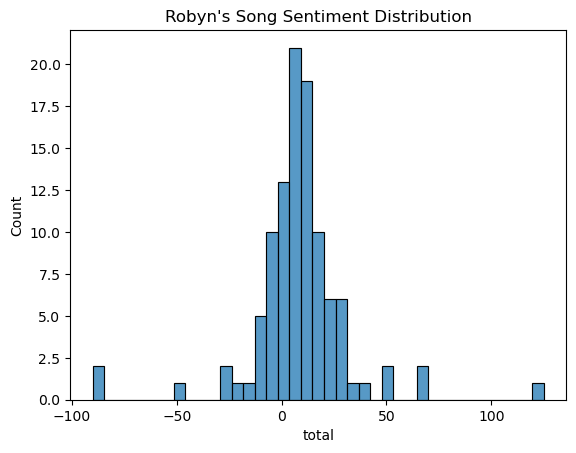

In [33]:
sns.histplot(data = song_sentiment[song_sentiment['artist']=='Robyn'], x = 'total')
plt.title("Robyn's Song Sentiment Distribution")
plt.show()

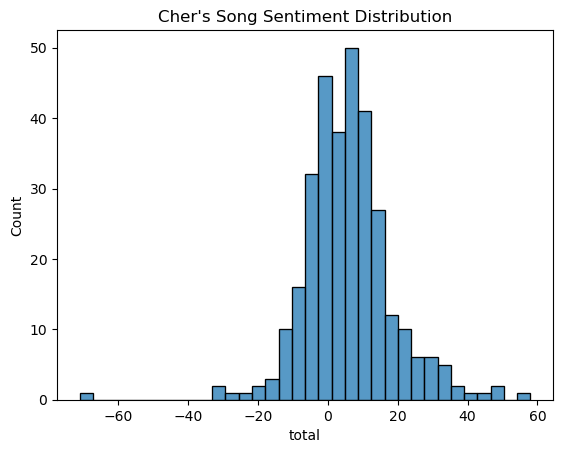

In [34]:
sns.histplot(data = song_sentiment[song_sentiment['artist']=='Cher'], x = 'total', )
plt.title("Cher's Song Sentiment Distribution")
plt.show()

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: Overall, Robyn has a higher positive sentiment. Both Cher and Robyn have a positive sentiment by average, but Robyn's is 3 higher by average. This makes sense considering much of Robyn's lyrics pertains to upbeat dancing. 

---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: 
For Robyn, her highest sentiment songs were: Love Is Free, We Dance To The Beat, & Between The Lines, and her most negative songs were: Don't Fucking Tell Me What To Do, Criminal Intent, & Love Kills. The positive songs were highlighting more of the positive aspects of a relationship or positive dance music to have fun to. The negative three songs were a song that mostly pertains to getting wild and liberating herself while the other two songs are more harsh break up songs. 

---

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: For Cher, her most positive sentiment songs were: Love And Understanding, Perfection, & I Found You Love, and her most negative songs were: Bang-Bang, Bang Bang (My Baby Shot Me Down), & Outrageous. Again, her top three most positive songs are regarding happy moments in romantic relationships while her most negative ones are about break ups. 

I think for both artists, whether the song is about a bad breakup or a makeup define whether or not the song is going to have positive or negative sentiment. Overall, Robyn's sentiment is higher because her music is meant to be dance music that gets people up and moving together. 

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.

Looking at the two distributions, both have a strong peak right above 0 at around 5 - 10. Robyn's is slightly skewed to the left, but the more normal of the distributions between the two. Cher's distribution has a slight tail to the left. The primary difference in the averages stem from Cher having a large between -1 - -20 that is quite higher than the similar area for Robyn. 

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [48]:
# your code here
positive = ['👍','😂','🥰','😇','😏','🥶','❤','👌','😘','😁']
negative = ['😪','🤕','😑','😭','😢','😡','😈','🤡','🤬','💔']
pos_num = [1] * len(positive)
neg_num = [-1] * len(negative)

emojis = pd.concat([pd.DataFrame({'emoji': positive, 'sentiment': pos_num}), pd.DataFrame({'emoji':negative,'sentiment':neg_num})], axis = 0).reset_index(drop = True)

In [49]:
emojis.head()

,emoji,sentiment
0,👍,1
1,😂,1
2,🥰,1
3,😇,1
4,😏,1


### Robyn Emoji Sentiment

In [51]:
# Extracting the emojis from the lists
robps = []
robng = []
robpos = []
robneg = []

emojis_l = []
counts = []

for i in twitter_desc['robyn']:
    emo = []
    counter = 0
    for w in i.split():
        for l in w:
            if l in list(positive):
                robpos.append(l)
                emo.append(l)
                robps.append(1)
                counter += 1
            elif l in list(negative):
                robneg.append(l)
                emo.append(l)
                robng.append(-1)
                counter -= 1
    emojis_l.append(", ".join(map(str,emo)))
    counts.append(counter)


In [52]:
remosent_df = pd.DataFrame({'emojis': emojis_l, "sentiment": counts})
remosent_df.loc[(remosent_df['emojis'])==''] = np.NaN

In [53]:
remosent_df.dropna(inplace = True)

In [54]:
print("Robyn mean Sentiment for Twitter:", remosent_df['sentiment'].mean())

Robyn mean Sentiment for Twitter: 1.3088878096163186


In [55]:
rps_df = pd.DataFrame({'emoji': robpos, 'sentiment': robps})
print("Positive Sentiment Emojis Used:", rps_df['sentiment'].sum())

Positive Sentiment Emojis Used: 5721


In [56]:
rng_df = pd.DataFrame({'emoji': robneg, 'sentiment': robng})
print("Negative Sentiment Emojis Used:", rng_df['sentiment'].sum())

Negative Sentiment Emojis Used: -331


In [57]:
rps_df.groupby('emoji').sum().sort_values('sentiment', ascending = False)

,sentiment
emoji,
❤,4808
😘,197
👍,136
🥰,132
😂,119
😁,101
👌,99
😇,75
😏,45


In [58]:
rng_df.groupby('emoji').sum().sort_values('sentiment', ascending = True)

,sentiment
emoji,
😈,-128
💔,-60
🤡,-54
😭,-41
😡,-12
🤬,-11
😑,-9
😢,-9
😪,-5


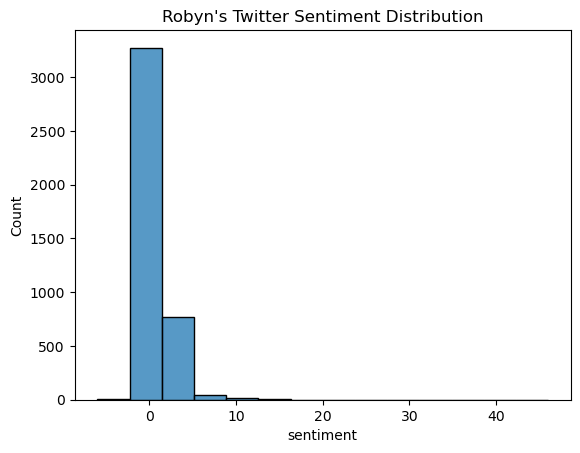

In [69]:
sns.histplot(data = remosent_df, x = 'sentiment', )
plt.title("Robyn's Twitter Sentiment Distribution")
plt.show()

### Cher Emoji Sentiment

In [59]:
# Extracting the emojis from the lists
cherps = []
cherng = []
cherpos = []
cherneg = []

emojis_ll = []
countss = []

for i in twitter_desc['cher']:
    emo = []
    counter = 0
    for w in i.split():
        for l in w:
            if l in list(positive):
                cherpos.append(l)
                cherps.append(1)
                emo.append(l)
                counter += 1
            elif l in list(negative):
                cherneg.append(l)
                cherng.append(-1)
                emo.append(l)
                counter -= 1
    emojis_ll.append(", ".join(map(str,emo)))
    countss.append(counter)

In [60]:
cemosent_df = pd.DataFrame({'emojis': emojis_l, "sentiment": counts})
cemosent_df.loc[(cemosent_df['emojis'])==''] = np.NaN

In [61]:
cemosent_df.dropna(inplace = True)

In [62]:
print("Cher mean Sentiment for Twitter:", cemosent_df['sentiment'].mean())

Cher mean Sentiment for Twitter: 1.3088878096163186


In [63]:
cps_df = pd.DataFrame({'emoji': cherpos, 'sentiment': cherps})
print("Positive Sentiment Emojis Used:", cps_df['sentiment'].sum())

Positive Sentiment Emojis Used: 103563


In [64]:
cng_df = pd.DataFrame({'emoji': cherneg, 'sentiment': cherng})
print("Negative Sentiment Emojis Used:", cng_df['sentiment'].sum())

Negative Sentiment Emojis Used: -7157


In [65]:
cps_df.groupby('emoji').sum().sort_values('sentiment', ascending = False)

,sentiment
emoji,
❤,79373
😘,5666
🥰,4158
😂,3608
😁,2732
😇,2391
👍,2254
👌,2045
😏,1169


In [66]:
cng_df.groupby('emoji').sum().sort_values('sentiment', ascending = True)

,sentiment
emoji,
😈,-2351
💔,-1616
🤡,-1027
😭,-738
🤬,-385
😢,-340
😡,-319
😑,-184
😪,-138


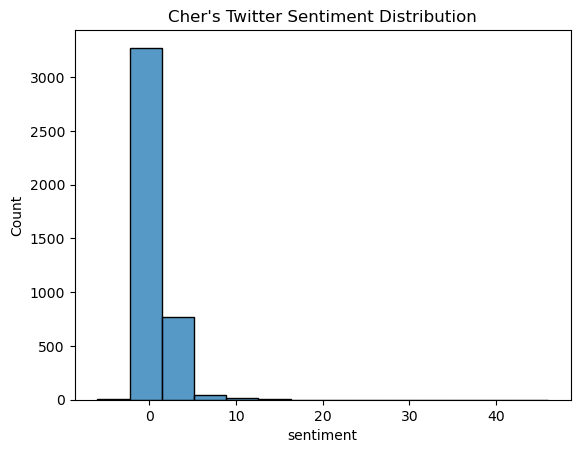

In [68]:
sns.histplot(data = cemosent_df, x = 'sentiment', )
plt.title("Cher's Twitter Sentiment Distribution")
plt.show()

Q: What is the average sentiment of your two artists? 

A: The average sentiment for Cher is: 1.3
The average sentiment for Robyn is: 1.3

Both artists have their typical users that sit right around between -1 to 5. Very few users for both artists are outside this range likely due to the limited amount of emojis used for this inquery. 

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: For Robyn, the most positive is ❤, and the most negative emoji is 😈

For Cher, the most positive is ❤, and the most negative emoji is 😈

I am not suprised overall that the heart emoji is the most popular and widely used, but I am shocked that the devil emoji is getting so much use, although, in light of this it may be arguable that this emoji is being used positively or negatively. 